In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
print(df.shape)
print(df.columns)

(178, 14)
Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [7]:
df.duplicated().sum()

np.int64(0)

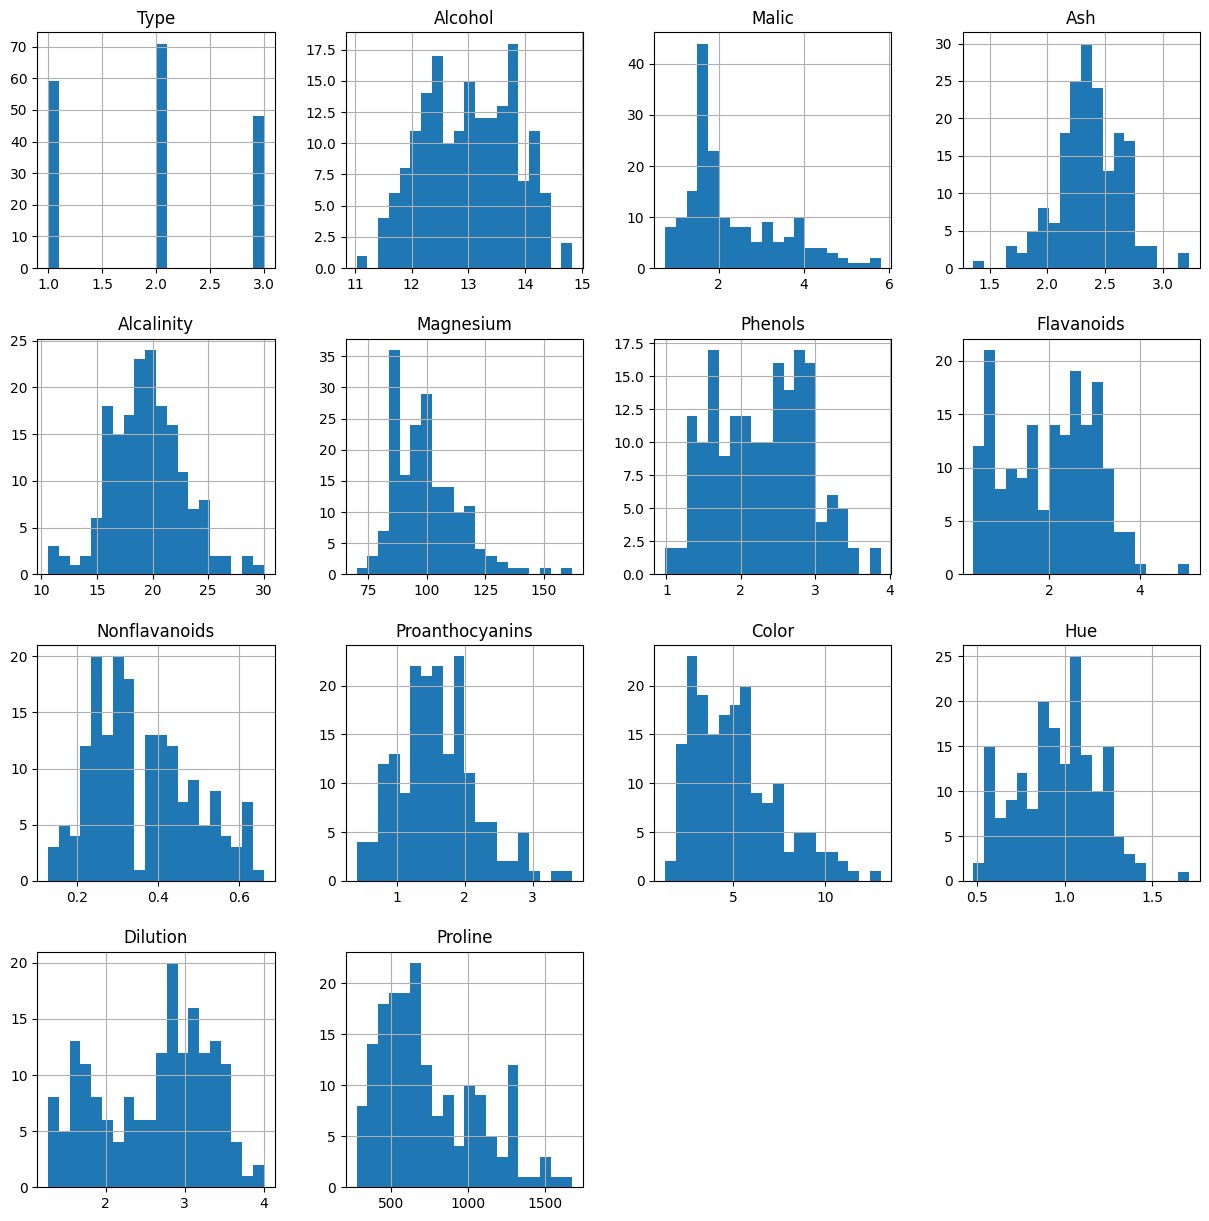

In [8]:
df.hist(bins=20,figsize=(15,15))
plt.show()

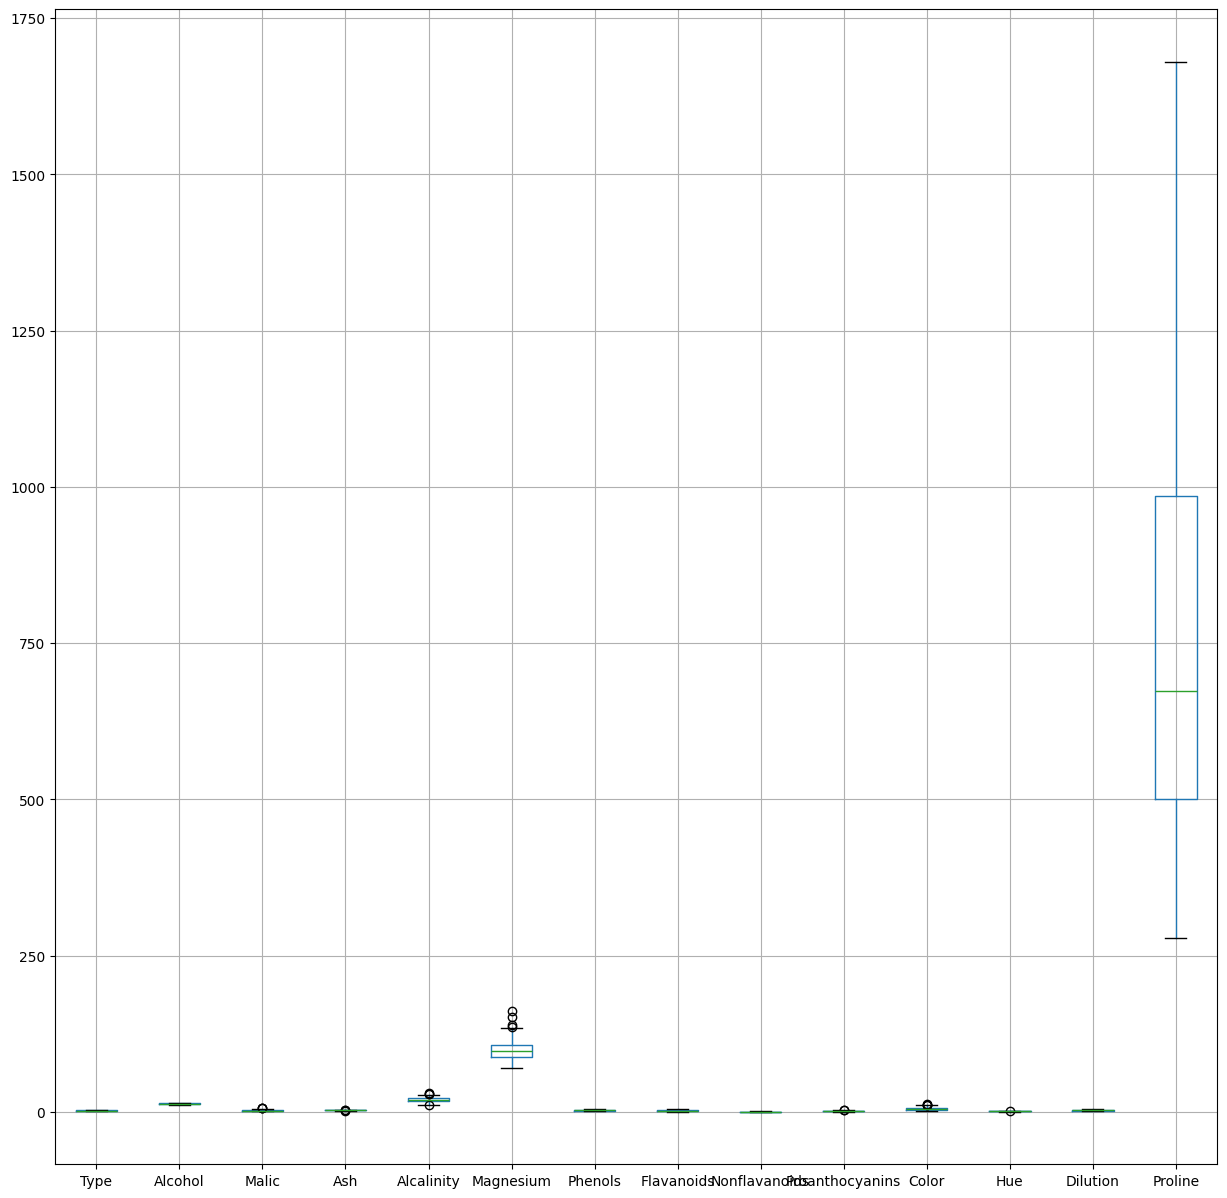

In [9]:
df.boxplot(figsize=(15,15))
plt.show()

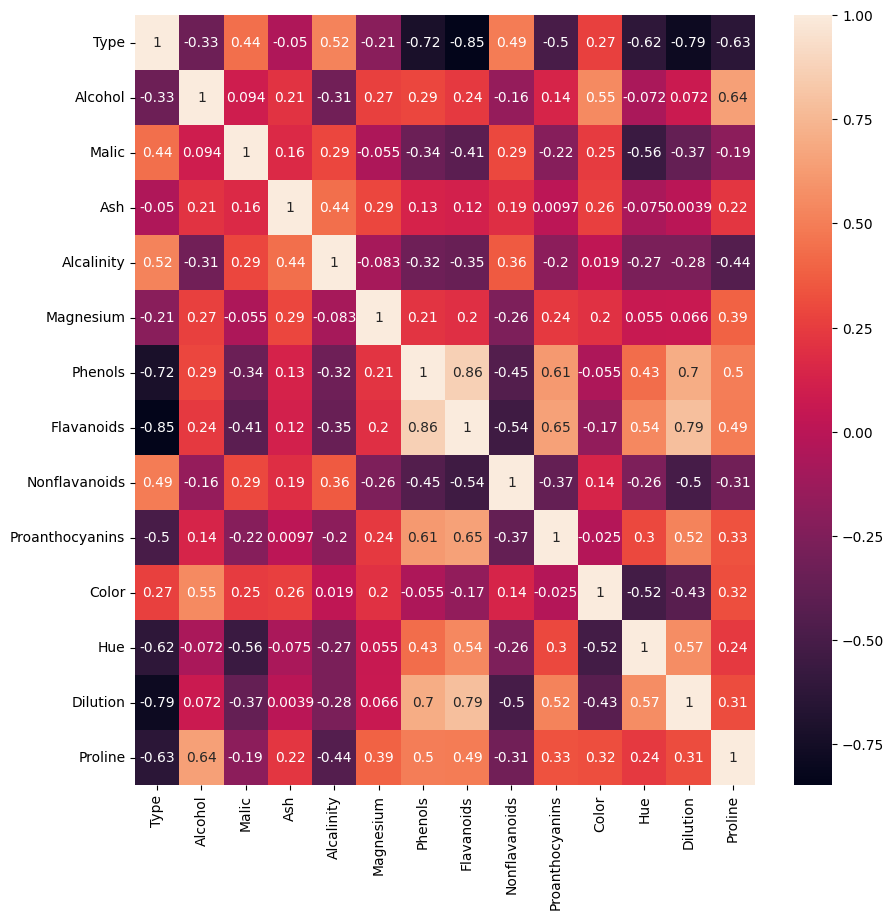

In [10]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

**Dimesionality Reduction with PCA**

In [12]:
norm=scale(df)
norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [14]:
pca=PCA(n_components=2)
pca_values=pca.fit_transform(norm)
pca_values

array([[-3.5229339 ,  1.45309844],
       [-2.52885806, -0.33001925],
       [-2.78502898,  1.03693595],
       [-3.92258841,  2.76821026],
       [-1.40751111,  0.86777309],
       [-3.28812981,  2.13017513],
       [-2.75057754,  1.17916999],
       [-2.39286652,  1.61128232],
       [-2.79525633,  0.92317952],
       [-3.00559666,  0.79628417],
       [-3.67868855,  1.31252342],
       [-2.10963477,  0.61298199],
       [-2.43845636,  0.67852331],
       [-3.67349453,  1.14012136],
       [-4.44157575,  2.11031917],
       [-2.60892387,  1.66641801],
       [-2.47542846,  2.33089672],
       [-2.22623243,  1.63359016],
       [-3.74226929,  2.52840527],
       [-2.3944115 ,  1.06452946],
       [-3.33656895,  0.79601279],
       [-1.48140399,  0.24008547],
       [-2.82806867, -0.08685755],
       [-2.00771405, -0.51561649],
       [-2.11463604, -0.31592057],
       [-1.39753751,  0.93821529],
       [-2.13348803,  0.68710205],
       [-1.62970383, -0.09118403],
       [-2.50760753,

In [15]:
var=pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259])

In [16]:
var1=np.cumsum(np.round(var,4)*100)
var1

array([39.54, 57.38])

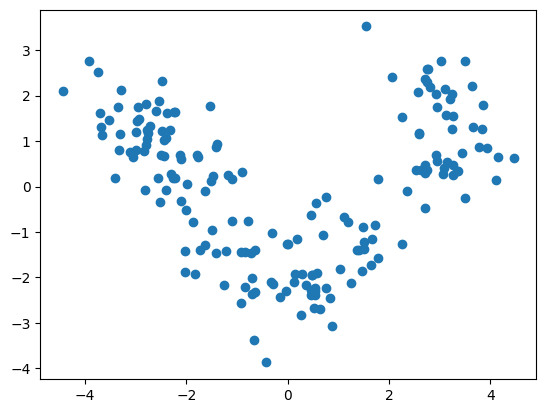

In [17]:
x=pca_values[:,0]
y=pca_values[:,1]
plt.scatter(x,y)
plt.show()

**Clsuter with Original Data**

In [18]:
inertia=[]
for i in range (1,15):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)

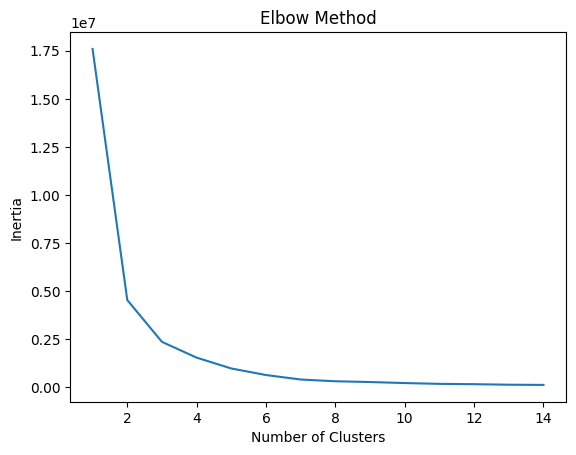

In [19]:
plt.plot(range(1,15),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
k_clusters=KMeans(n_clusters=3, random_state=0)
k_clusters.fit(norm)

KMeans(n_clusters=3, random_state=0)

In [31]:
labels=k_clusters.predict(norm)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

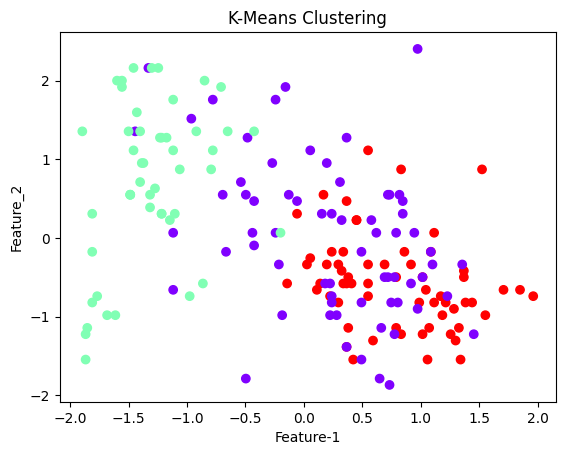

In [32]:
plt.scatter(norm[:,12],norm[:,8],c=labels,cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Feature-1')
plt.ylabel('Feature_2')
plt.show()

In [33]:
kmeans_silhouette_score = silhouette_score(norm, labels)
print("K-Means Silhouette Score:", kmeans_silhouette_score)

K-Means Silhouette Score: 0.30648398324833453


**Clustering With PCA Data**

In [34]:
inertia=[]
for i in range (1,15):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(pca_values)
  inertia.append(kmeans.inertia_)

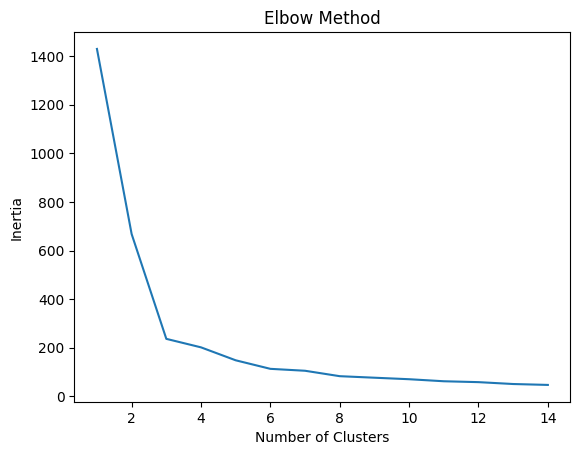

In [35]:
plt.plot(range(1,15),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
k_clus1=KMeans(n_clusters=3, random_state=0)
k_clus1.fit(pca_values)

KMeans(n_clusters=3, random_state=0)

In [37]:
labesl1=k_clus1.predict(pca_values)
labesl1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

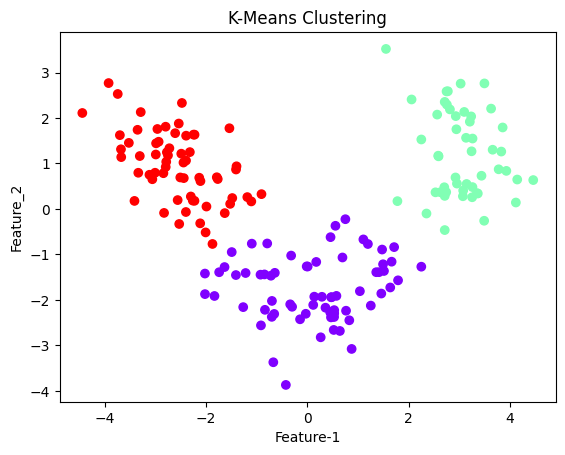

In [38]:
plt.scatter(pca_values[:,0],pca_values[:,1],c=labesl1,cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Feature-1')
plt.ylabel('Feature_2')
plt.show()

In [39]:
kmeans_silhouette_score1=silhouette_score(pca_values,labesl1)
print("K-Means Silhouette Score:", kmeans_silhouette_score1)

K-Means Silhouette Score: 0.6024415520362845


**Comparison and Analysis**

In [40]:
comparing_cluster=pd.DataFrame({
    'ORIGINAL DATA':kmeans_silhouette_score,
    'PCA DATA':kmeans_silhouette_score1
},index=['Silhouette Score'])
comparing_cluster


,ORIGINAL DATA,PCA DATA
Silhouette Score,0.306484,0.602442
